In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [72]:
gpt4 = pd.read_csv('../generation/answers/zero-shot_gpt-4-0125-preview.csv')
mixtral = pd.read_csv('../generation/answers/zero-shot_mixtral.csv')
melm = pd.read_csv('../generation/answers/zero-shot_melm.csv')
survey = pd.read_csv('../data/survey_responses_mapped.csv')


In [73]:
# Add an identifier column to each dataset
gpt4['Dataset'] = 'GPT-4'
mixtral['Dataset'] = 'Mixtral'
melm['Dataset'] = 'MechGPT'
survey['Dataset'] = 'Survey'

# Combine the datasets
combined_df = pd.concat([survey, gpt4, mixtral, melm])

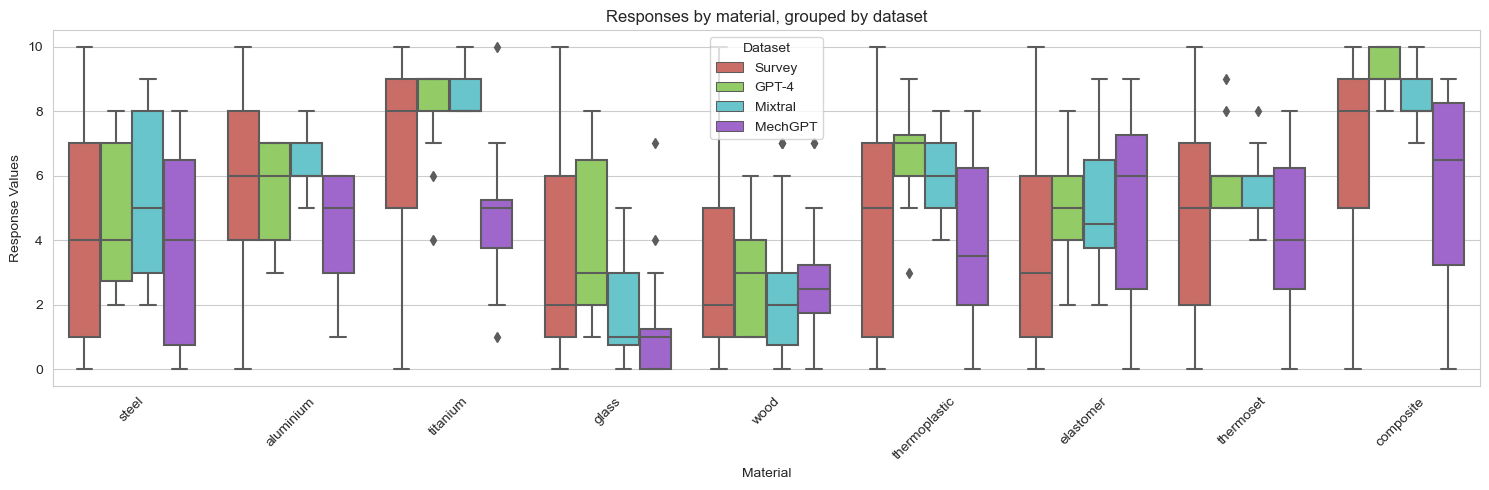

In [89]:
# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=combined_df, x='material', y='response', hue='Dataset',
            palette='hls') #, showfliers=False)

plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('responses_by_material_grouped_by_dataset.pdf')
plt.show()


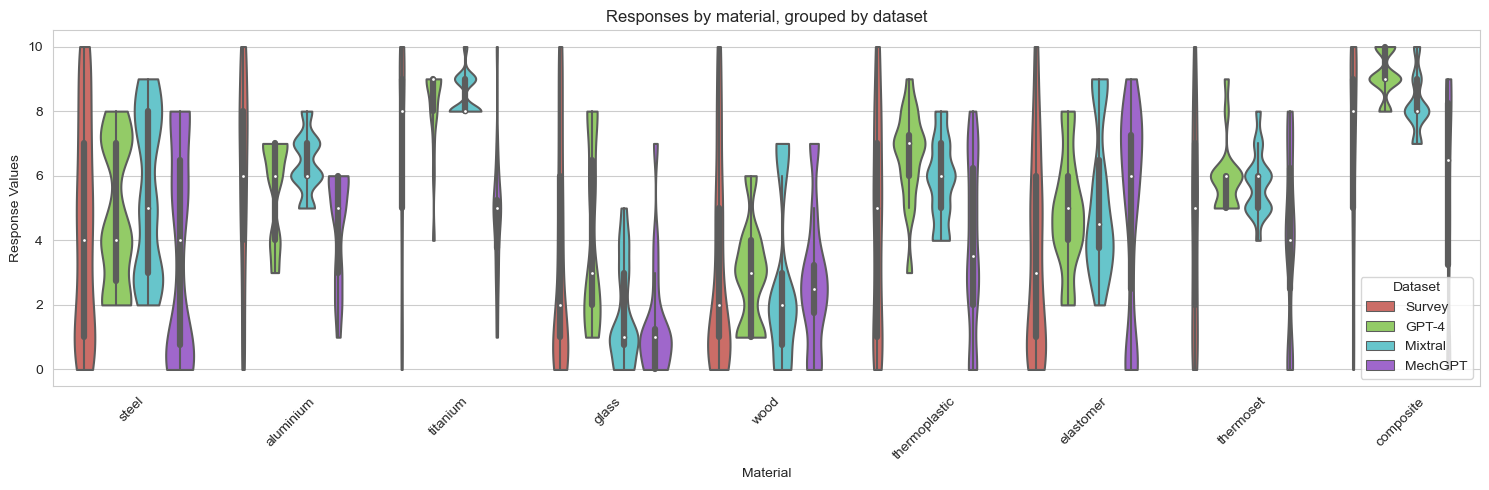

In [85]:
# make a violin plot
plt.figure(figsize=(15, 5))
sns.violinplot(data=combined_df, x='material', y='response', hue='Dataset',
               palette='hls', cut=0, bw=0.3)
plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('responses_by_material_grouped_by_dataset-violin.pdf')
plt.show()

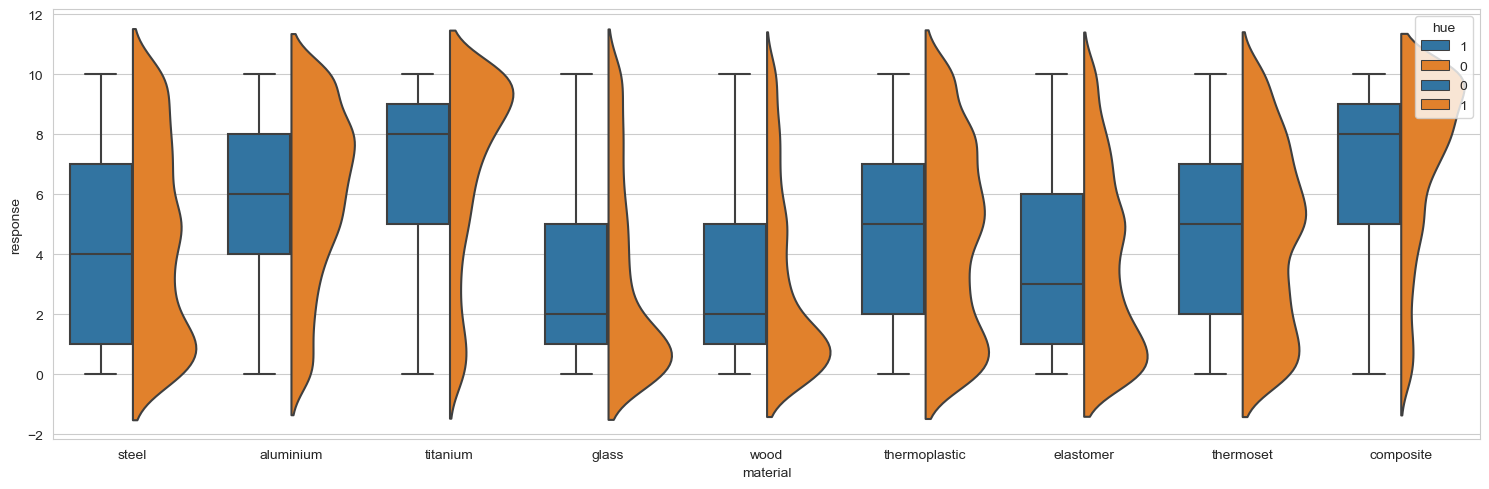

In [80]:
# make a violin plot
plt.figure(figsize=(15, 5))
combined_df2 = combined_df.assign(hue=1)

sns.boxplot(data=combined_df2, x='material', y="response", hue="hue", hue_order=[1,0])

g = sns.violinplot(data=combined_df2, x='material', y='response', hue="hue", split=True, hue_order=[0,1])
# g.title('Responses by material, grouped by dataset')
# g.ylabel('Response Values')
# g.xlabel('Material')
# g.legend(title='Dataset')
# g.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
# plt.savefig('responses_by_material_grouped_by_dataset-violin.pdf')
# g.show()


## Parallel results

8325


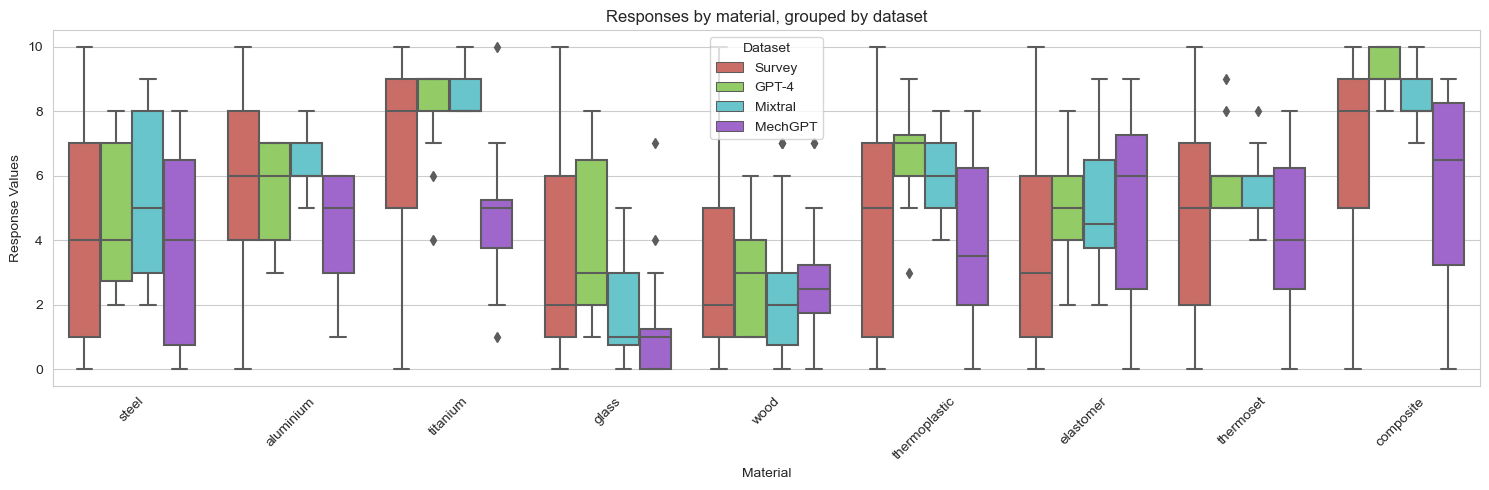

In [77]:
gpt4 = pd.read_csv('../generation/answers/parallel_gpt-4-0125-preview.csv')
mixtral = pd.read_csv('../generation/answers/parallel_mixtral.csv')
melm = pd.read_csv('../generation/answers/parallel_melm.csv')
survey = pd.read_csv('../data/survey_responses_mapped.csv')

# Add an identifier column to each dataset
gpt4['Dataset'] = 'GPT-4'
mixtral['Dataset'] = 'Mixtral'
melm['Dataset'] = 'MechGPT'
survey['Dataset'] = 'Survey'

# Combine the datasets
combined_df = pd.concat([survey, gpt4, mixtral, melm])

# make 'response' column numeric, if it's cannot be converted to numeric, it will be NaN
combined_df['response'] = pd.to_numeric(combined_df['response'], errors='coerce')

# count nans
print(combined_df['response'].isna().sum())

# Recreate the box and whisker plot with updated dataset names and excluding outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=combined_df, x='material', y='response', hue='Dataset',
            palette='hls')  #, showfliers=False)

plt.title('Responses by material, grouped by dataset')
plt.ylabel('Response Values')
plt.xlabel('Material')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
# save figure without cropping the labels
plt.tight_layout()
plt.savefig('responses_by_material_grouped_by_dataset.pdf')
plt.show()
